# Premiers programmes

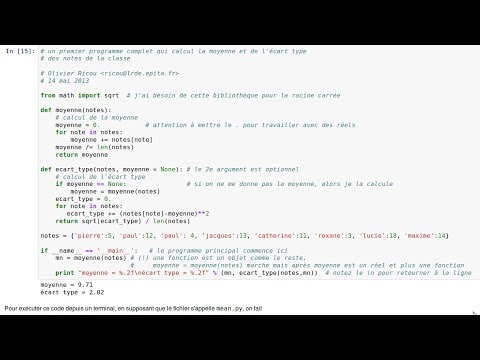

In [1]:
from IPython.display import YouTubeVideo # valider la cellule si la vidéo n'est pas visible
YouTubeVideo('iMZ33kNMBYM')

Un programme est une suite d'instructions. En fait vous avez déjà écrit plusieurs programmes, chacune des cellules avec du code était un programme.

La structure usuelle d'un programme est un fichier avec

   * les en-tête
   * les fonctions
   * la fonction principale

Pour un projet, on aura plusieurs fichiers qu'on assemblera pour faire un ensemble cohérent. Une bibliothèque est un tel ensemble de fichiers.

Python étant un langage objet, il est possible de définir de nouvelles structures de données qui simplierons l'écriture de programmes complexes.


## Premier programme

Regardons ce premier programme avec ses commentaires, la fonction `sqrt` importé de la bibliothèque `math`, ses fonctions et son `if` bizarre que l'on peut ignorer en première lecture.
Il ressemble fortement à ce que l'on a fait jusqu'à présent dans nos cellules. En fait sa différence est qu'il est fait pour être dans un fichier et qu'il a la structure usuelle d'un petit
programme.

In [2]:
# un premier programme complet qui calcul la moyenne et de l'écart type
# des notes de la classe
#
# Olivier Ricou <ricou@lrde.epita.fr>
# 10/08/16

from math import sqrt  # j'ai besoin de cette bibliothèque pour la fonction racine carrée

def moyenne(notes):
    '''
    Calcul de la moyenne du dictionnaire donné en argument.
    '''
    moyenne = 0.            # attention à mettre le . pour travailler avec des réels
    for note in notes:
        moyenne += notes[note]
    try:
        moyenne /= len(notes)
    except ZeroDivisionError:
        raise Exception("dictionnaire vide")
    return moyenne

def ecart_type(notes, moyenne = None): # le 2e argument est optionnel
    '''
    Calcul de l'écart type à la moyenne du dictionnaire données en premier argument.
    '''
    if moyenne == None:           # si on ne me donne pas la moyenne, alors je la calcule
        moyenne = moyenne(notes)
    ecart_type = 0.
    for note in notes: 
        ecart_type += (notes[note]-moyenne)**2
    try:
        ecart_type = sqrt(ecart_type) / len(notes)  
    except ZeroDivisionError:
        raise Exception("dictionnaire vide")
    return ecart_type
    
if __name__ == '__main__':   # le programme principal commence ici
    
    notes = {'pierre':5, 'paul':12, 'paul': 4, 'jacques':13, 'catherine':11, 'roxane':3, 
             'lucie':18, 'maxime':14}

    mn = moyenne(notes)      # /!\ moyenne = moyenne(notes) marche mais écrasse 
                             #     la fonction moyenne, moyenne devient un réel
    print("moyenne = %.2f\nécart type = %.2f" % (mn, ecart_type(notes,mn)))

moyenne = 9.71
écart type = 2.02


Notez que l'expression cabalistique

     if __name__ == '__main__':
        
n'a de sens que lorsque le fichier qui contient le programme peut être appelé par un autre programme. Cela permet d'indiquer que cette partie ne doit être exécutée que lorsque qu'on exécute le fichier (`python mon_fichier`). On verra cela plus tard mais pour les curieux c'est indiqué dans la vidéo.

### Coding style

Il est important de pouvoir relire aisément un programme. Aussi la communauté de Python a défini les règles d'un joli style d'écriture qu'il est conseillé de suivre. Ces règles sont décrites dans le <br>

<center><a href="http://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a></center>

Ce cours respecte ce style d'écriture. Si vous constastez des non respects de style, soyez aimable de m'en informer.

## Deuxième programme (lecture de données dans un fichier)

Lisons les notes écrites dans le fichier appellé `notes` du répertoire `data`. On va ouvrir le fichier puis lire les lignes une à une dans une boucle. Ensuite extraire les noms et les notes n'est que de la manipulation de chaînes de caractères.  

iPython permet de lancer simplement des commandes UNIX avec un ! au début. Pour afficher le contenu d'un fichier on utilise `cat`. Voici le contenu du fichier:

In [3]:
!cat data/notes

pierre; 5
paul ; 12
jacques; 13
catherine;11
roxane; 3
lucie; 18
maxime; 14


et le programme qui fait le travail:

In [4]:
with open("data/notes") as fichier:  # le fichier notes est rangé dans le répertoire data
    notes = {}
    for ligne in fichier:  # lit le fichier ligne par ligne
        champs = ligne.split(';')
        print(ligne, champs)
        nom = champs[0]
        note = float(champs[1].strip()) # strip() enlève le retour à la ligne : \n
        notes[nom] = note
    print(notes)

pierre; 5
 ['pierre', ' 5\n']
paul ; 12
 ['paul ', ' 12\n']
jacques; 13
 ['jacques', ' 13\n']
catherine;11
 ['catherine', '11\n']
roxane; 3
 ['roxane', ' 3\n']
lucie; 18
 ['lucie', ' 18\n']
maxime; 14
 ['maxime', ' 14\n']
{'pierre': 5.0, 'paul ': 12.0, 'jacques': 13.0, 'catherine': 11.0, 'roxane': 3.0, 'lucie': 18.0, 'maxime': 14.0}


Notez que les espaces avant les nombres ont été absorbés lors de la conversion en flottant mais que l'espace après le nom de Paul est resté.

Notes :

* les notes sont lues comme des chaînes de caractère. Pour convertir une chaîne de caractère en chiffre il faut la typer, dans notre cas en réels (`float`),
* `with` permet de gérer un contexte, l'ouverture d'un fichier ici et donc de bien le fermer en sortant du bloc with, que cela soit une sortie normale ou non (cet aspect n'est pas important pour l'instant).


### Écriture dans un fichier

In [5]:
with open("data/test","w") as sortie:    # 'r' pour read (par défaut), 
                                         # 'a' pour ajouter à la fin, 
                                         # 'w' pour write et efface ce qui existe
    sortie.write('moyenne : %f\n' % moyenne(notes)) # le \n pour avoir un retour à la ligne

### Exercice

Ecrire un programme complet et documenté qui donne le nombre de caratères, le nombre de mots et le nombre de lignes du fichier `notes`. On définit un mot comme ce qui est séparé par un espace ou un retour à la ligne.

Sous UNIX la commande `wc` qui donne le nombre de lignes, de mots et de caractères :

In [6]:
!wc data/notes

 7 14 76 data/notes


In [7]:
def wc(datafile):
    # YOUR CODE HERE
    raise NotImplementedError() # remove this line

##### Solution

In [8]:
def wc(datafile):  # file is a keyword, don't use it as an argument
    '''
    Print number of lines, words and character for a file
    '''
    with open(datafile) as f:
        nb_lines = 0
        nb_words = 0
        nb_chars = 0
        for l in f :
            nb_lines += 1
            nb_words += len(l.split(' '))
            nb_chars += len(l)
        return nb_lines, nb_words, nb_chars

wc('data/notes')

(7, 14, 76)

## Bug !

Si votre programme ne marche pas comme prévu, il y a différents cas :

* votre programme ne finit pas et envoie un message d'erreur

> regardez cette [aide](argh.pdf).

* votre programme finit mais le résultat est mauvais

> il faut trouver où l'algorithme est faux. Pour cela il est souvent utile 
>
> * d'afficher avec des `print` certaines valeurs au cours du programme
> * de découper son programme en petits morceaux et tester chaque morceau
> * d'utiliser le [debugger de Python](https://docs.python.org/3/library/pdb.html) (pas simple mais est peut-être intégré dans votre environnement de développement et donc plus simple à utiliser)

* votre programme ne finit pas et reste muet

> regardez l'[aide](argh.pdf) et les conseils ci-dessus.

{{ PreviousNext("05 - Erreurs et exceptions.ipynb", "07 - Algorithmique et tris.ipynb") }}